<a href="https://colab.research.google.com/github/Souvik0651/Cardiovascular-Risk-Prediction--classification-/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone project3-clasiffication/data_cardiovascular_risk.csv')

In [8]:
df.head(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [9]:
df.tail(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [11]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [12]:
df.drop('education',axis='columns',inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 423.9+ KB


In [16]:
df.is_smoking.unique()

array(['YES', 'NO'], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lb_encod = LabelEncoder()

In [25]:
df.sex=lb_encod.fit_transform(df.sex)

In [24]:
df.is_smoking=lb_encod.fit_transform(df.is_smoking)

In [27]:
# in sex column female is 0 & male is 1 and is_smoking 1=yes 0=no
df.head(3)

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [32]:
df.tail(3)

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3387,3387,44,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1,0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,0,0,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [29]:
df.columns

Index(['id', 'age', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 423.9 KB


In [36]:
df.describe()

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3390.000000,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,0.432743,0.497640,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,0.495529,0.500068,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [60]:
df.cigsPerDay.fillna(df.cigsPerDay.median(),inplace=True)
df.cigsPerDay=df.cigsPerDay.astype('int')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 423.9 KB


In [61]:
df.BPMeds .unique()

array([ 0., nan,  1.])

In [76]:
df.BPMeds=df.BPMeds.fillna(df.BPMeds.mode()[0])
df.BPMeds=df.BPMeds.astype('int')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   sex              3390 non-null   int64  
 3   is_smoking       3390 non-null   int64  
 4   cigsPerDay       3390 non-null   int64  
 5   BPMeds           3390 non-null   int64  
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(6), int64(10)
memory usage: 423.9 KB


In [85]:
df.totChol=df.totChol.fillna(df.totChol.median())
df.totChol=df.totChol.astype('int')

In [89]:
df.BMI=df.BMI.fillna(df.BMI.median())

In [90]:
df.heartRate.unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

In [101]:
df.drop(df[df.heartRate.isna()].index,inplace=True)
df.heartRate=df.heartRate.astype('int')

In [105]:
df.glucose.fillna(df.glucose.median(),inplace=True)

In [108]:
df.glucose=df.glucose.astype('int')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3389 non-null   int64  
 1   age              3389 non-null   int64  
 2   sex              3389 non-null   int64  
 3   is_smoking       3389 non-null   int64  
 4   cigsPerDay       3389 non-null   int64  
 5   BPMeds           3389 non-null   int64  
 6   prevalentStroke  3389 non-null   int64  
 7   prevalentHyp     3389 non-null   int64  
 8   diabetes         3389 non-null   int64  
 9   totChol          3389 non-null   int64  
 10  sysBP            3389 non-null   float64
 11  diaBP            3389 non-null   float64
 12  BMI              3389 non-null   float64
 13  heartRate        3389 non-null   int64  
 14  glucose          3389 non-null   int64  
 15  TenYearCHD       3389 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 579.1 KB


In [115]:
df.corr()

,id,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.016921,0.001110,-0.001418,-0.018029,0.006998,-0.038881,0.013376,0.003675,-0.019830,0.019851,0.000771,0.039822,0.024684,0.014225,0.010094
age,0.016921,1.000000,-0.042477,-0.211615,-0.191937,0.122252,0.059103,0.308322,0.108001,0.272281,0.404316,0.222328,0.137127,-0.002596,0.112245,0.224028
sex,0.001110,-0.042477,1.000000,0.215219,0.329144,-0.043141,-0.011248,0.002575,0.008910,-0.069921,-0.037999,0.059077,0.086831,-0.118702,-0.003152,0.083931
is_smoking,-0.001418,-0.211615,0.215219,1.000000,0.763227,-0.037487,-0.043686,-0.119818,-0.053293,-0.046893,-0.146343,-0.124149,-0.173004,0.062185,-0.059482,0.033472
cigsPerDay,-0.018029,-0.191937,0.329144,0.763227,1.000000,-0.035691,-0.041561,-0.078365,-0.048082,-0.025260,-0.100805,-0.068183,-0.100039,0.066253,-0.066471,0.067551
BPMeds,0.006998,0.122252,-0.043141,-0.037487,-0.035691,1.000000,0.116179,0.257051,0.070925,0.080899,0.260601,0.198760,0.087702,0.018103,0.061379,0.087545
prevalentStroke,-0.038881,0.059103,-0.011248,-0.043686,-0.041561,0.116179,1.000000,0.071710,0.010111,-0.010779,0.057638,0.047223,0.017054,-0.019184,0.023672,0.068741
prevalentHyp,0.013376,0.308322,0.002575,-0.119818,-0.078365,0.257051,0.071710,1.000000,0.082663,0.158922,0.699061,0.613418,0.299372,0.150815,0.082817,0.165703
diabetes,0.003675,0.108001,0.008910,-0.053293,-0.048082,0.070925,0.010111,0.082663,1.000000,0.059177,0.124156,0.061138,0.087843,0.039742,0.609779,0.103881
totChol,-0.019830,0.272281,-0.069921,-0.046893,-0.025260,0.080899,-0.010779,0.158922,0.059177,1.000000,0.198158,0.153761,0.113567,0.086947,0.060963,0.093966


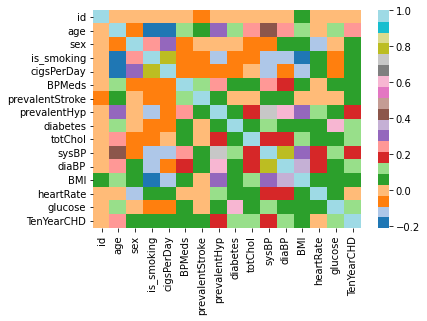

In [116]:
sns.heatmap(data=df.corr(),cmap='tab20')

In [119]:
# we can see id & heartrate has 0 correlation with Ten Year CHD 
df.drop(['id','heartRate'],axis='columns',inplace=True)